In [ ]:
# Mount Google Drive to access the saved model weights
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Install necessary packages
!pip install -U ipywidgets
!pip install ultralytics
!pip install roboflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.8/139.8 kB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 55.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 65.5 MB/s eta 0:00:00
  Attempting uninstall: widgetsnbextension
    Found existing installation: widgetsnbextension 3.6.10
    Uninstalling widgetsnbextension-3.6.10:
      Successfully uninstalled widgetsnbextension-3.6.10
  Attempting uninstall: ipywidgets
    Found existing installation: ipywidgets 7.7.1
    Uninstalling ipywidgets-7.7.1:
      Successfully uninstalled ipywidgets-7.7.1
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 887.3/887.3 kB 24.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.9/80.9 kB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 5.9 MB/s eta 0:00:00
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10


In [ ]:
from ultralytics import YOLO

# Specify the path to your saved weights on Google Drive
# Use 'best.pt' for best validation metrics, or 'last.pt' for the most recent weights
weights_path = '/content/drive/MyDrive/V8_2k_model/best.pt'  # Change to last.pt if preferred

# Load the model with your trained weights
model = YOLO(weights_path)
print(f"Model loaded with weights: {weights_path}")


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
Model loaded with weights: /content/drive/MyDrive/V8_2k_model/best.pt


In [ ]:
from PIL import Image
import matplotlib.pyplot as plt

def detection_pipeline(images):
    """
    Runs detection on a list of images and displays the results.

    :param images: List of image paths
    """
    # Perform detection on each image
    results = model(images)

    # Visualize the results
    for i, result in enumerate(results):
        # Plot results image
        im_bgr = result.plot()  # BGR-order numpy array
        im_rgb = Image.fromarray(im_bgr[..., ::-1])  # Convert to RGB PIL image

        plt.axis('off')
        plt.imshow(im_rgb)
        plt.show()



0: 640x640 1 left_right_lane, 21.8ms
1: 640x640 2 red_lights, 21.8ms
2: 640x640 1 bus_stop, 21.8ms
3: 640x640 1 yellow_light, 21.8ms
4: 640x640 1 parking, 21.8ms
5: 640x640 1 ped_crossing, 21.8ms
6: 640x640 1 stop, 21.8ms
7: 640x640 1 green_light, 21.8ms
8: 640x640 1 u_turn, 21.8ms
9: 640x640 2 red_lights, 21.8ms
10: 640x640 2 red_lights, 21.8ms
11: 640x640 1 do_not_turn_r, 21.8ms
12: 640x640 2 green_lights, 21.8ms
Speed: 7.5ms preprocess, 21.8ms inference, 91.8ms postprocess per image at shape (1, 3, 640, 640)


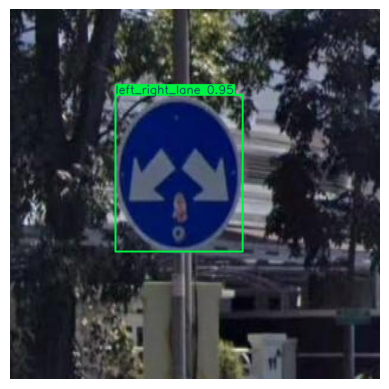

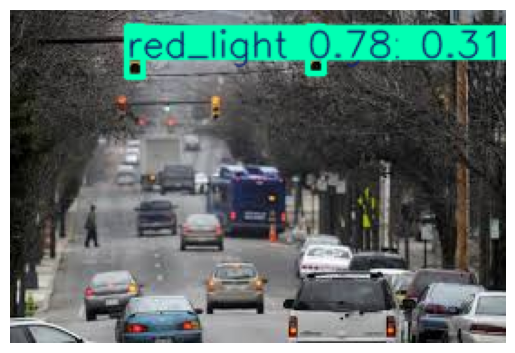

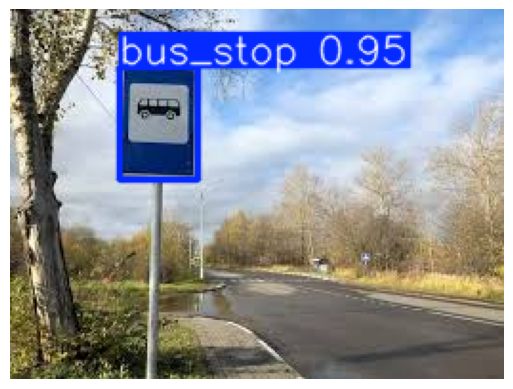

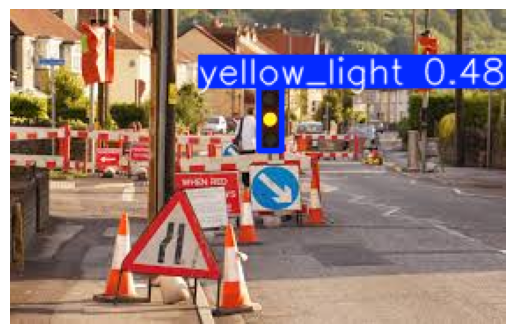

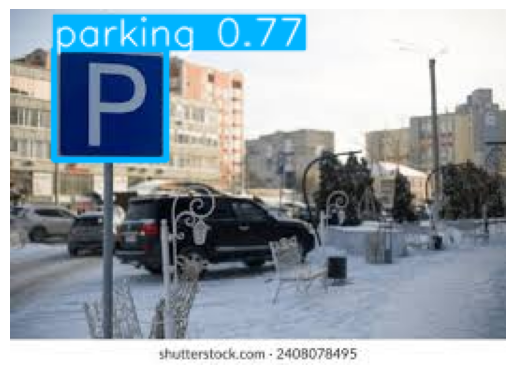

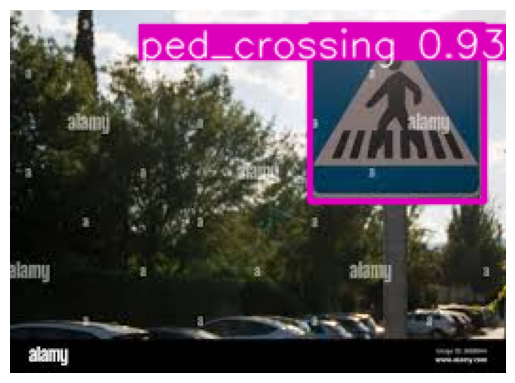

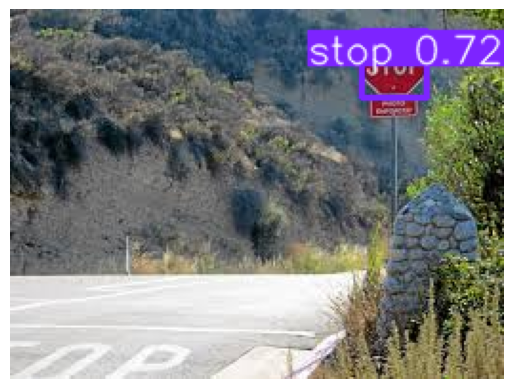

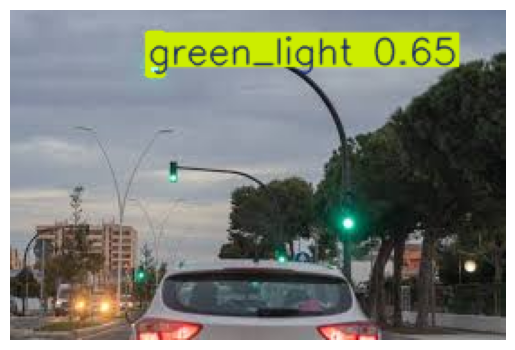

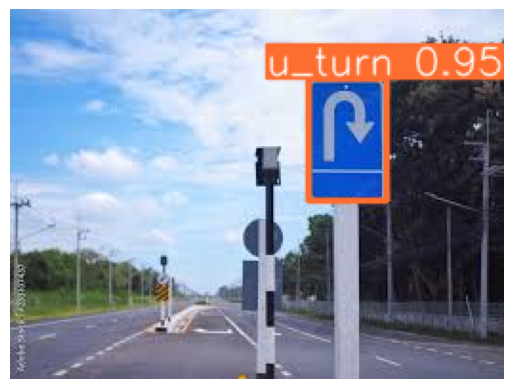

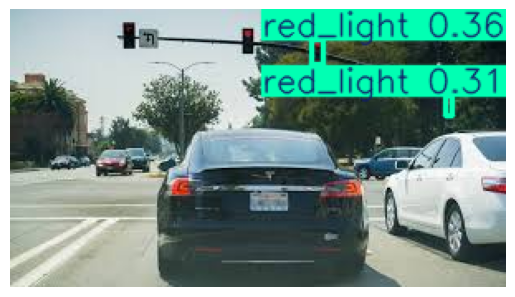

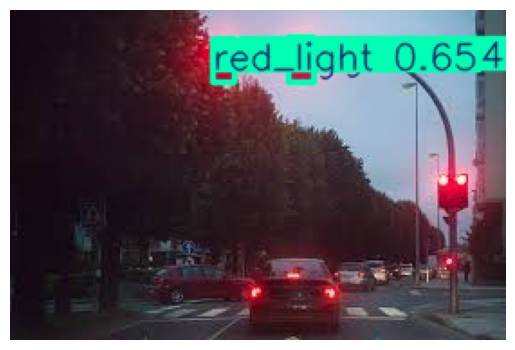

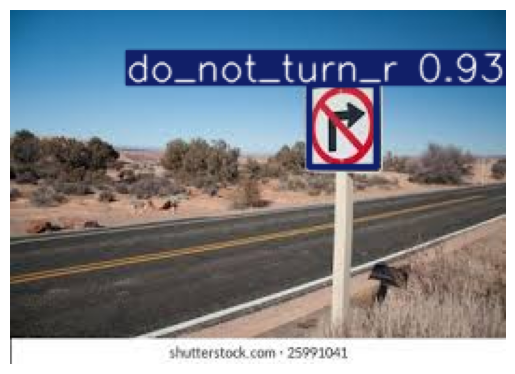

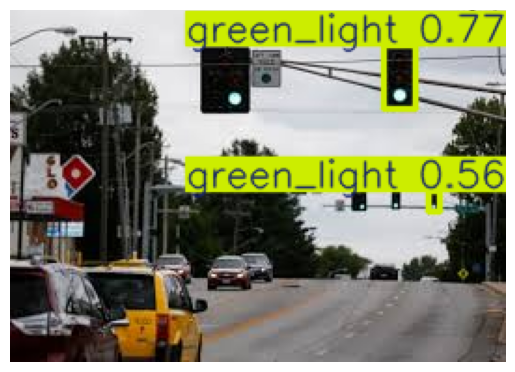

In [ ]:
# Example test images; adjust paths as needed or upload your own
test_images = [
    '/content/drive/MyDrive/Test images/1.jpg',
    '/content/drive/MyDrive/Test images/2.jpeg',
    '/content/drive/MyDrive/Test images/3.png',
    '/content/drive/MyDrive/Test images/4.jpeg',
    '/content/drive/MyDrive/Test images/5.jpeg',
    '/content/drive/MyDrive/Test images/6.jpeg',
    '/content/drive/MyDrive/Test images/7.jpeg',
    '/content/drive/MyDrive/Test images/9.jpeg',
    '/content/drive/MyDrive/Test images/10.jpeg',
    '/content/drive/MyDrive/Test images/11.jpeg',
    '/content/drive/MyDrive/Test images/12.jpeg',
    '/content/drive/MyDrive/Test images/12 (2).jpeg',
    '/content/drive/MyDrive/Test images/13.jpeg',
]

# Run detection on the test images
detection_pipeline(test_images)



0: 480x640 1 parking, 118.4ms
Speed: 3.2ms preprocess, 118.4ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


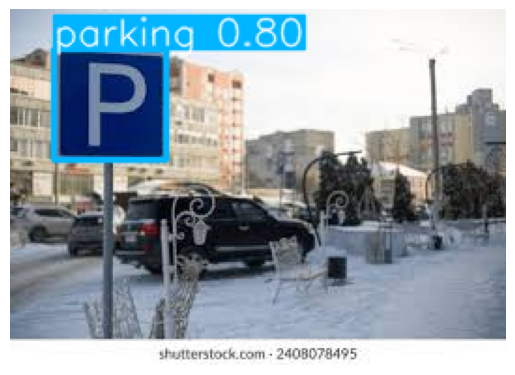

In [ ]:
test_images = [
    '/content/drive/MyDrive/Test images/5.jpeg',
]
# Run detection on the test images
detection_pipeline(test_images)

In [ ]:
# Import necessary libraries
import cv2
from ultralytics import YOLO
from google.colab.patches import cv2_imshow  # Display function for Colab

# Load the trained YOLO model with your weights
weights_path = '/content/drive/MyDrive/V8_2k_model/best.pt'  # Adjust to 'last.pt' if needed
model = YOLO(weights_path)
print(f"Model loaded with weights: {weights_path}")

def detect_video(input_path, output_path):
    """
    Perform object detection on a video file and save the output.

    :param input_path: Path to the input video file.
    :param output_path: Path to save the output video with detections.
    """
    # Capture the video
    cap = cv2.VideoCapture(input_path)

    # Check if the video was opened successfully
    if not cap.isOpened():
        print("Error: Could not open the video file.")
        return

    # Get video properties
    frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
    fps = cap.get(cv2.CAP_PROP_FPS)
    total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))

    # Define the codec and create a VideoWriter object to save output video
    fourcc = cv2.VideoWriter_fourcc(*'mp4v')  # Codec for .mp4 files
    out = cv2.VideoWriter(output_path, fourcc, fps, (frame_width, frame_height))

    frame_count = 0

    # Process each frame of the video
    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break

        frame_count += 1
        print(f"Processing frame {frame_count}/{total_frames}")

        # Run YOLO detection on the current frame
        results = model(frame)

        # Plot the results on the frame
        annotated_frame = results[0].plot()  # Get the annotated frame from results

        # Write the annotated frame to the output video
        out.write(annotated_frame)

        # Optionally display the frame in Colab (can be commented out to speed up processing)
        # cv2_imshow(annotated_frame)  # Uncomment to see the video frames in Colab

    # Release the video capture and writer objects
    cap.release()
    out.release()

    print(f"Detection complete. Output video saved to: {output_path}")

# Define the input video path and output video path
input_video_path = '/content/drive/MyDrive/Test images/training.mp4'  # Update with the path to your video file
output_video_path = '/content/drive/MyDrive/V8_2k_model/output_video.mp4'  # Save the output to Google Drive

# Run the video detection pipeline
detect_video(input_video_path, output_video_path)


Model loaded with weights: /content/drive/MyDrive/V8_2k_model/best.pt
Processing frame 1/1168

0: 640x384 1 do_not_u_turn, 178.5ms
Speed: 9.9ms preprocess, 178.5ms inference, 5.5ms postprocess per image at shape (1, 3, 640, 384)
Processing frame 2/1168

0: 640x384 1 do_not_u_turn, 25.3ms
Speed: 3.8ms preprocess, 25.3ms inference, 8.2ms postprocess per image at shape (1, 3, 640, 384)
Processing frame 3/1168

0: 640x384 1 do_not_u_turn, 46.6ms
Speed: 10.0ms preprocess, 46.6ms inference, 2.6ms postprocess per image at shape (1, 3, 640, 384)
Processing frame 4/1168

0: 640x384 1 do_not_u_turn, 60.6ms
Speed: 13.7ms preprocess, 60.6ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 384)
Processing frame 5/1168

0: 640x384 1 do_not_u_turn, 25.3ms
Speed: 3.3ms preprocess, 25.3ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 384)
Processing frame 6/1168

0: 640x384 1 do_not_u_turn, 25.2ms
Speed: 4.5ms preprocess, 25.2ms inference, 1.3ms postprocess per image at shape (